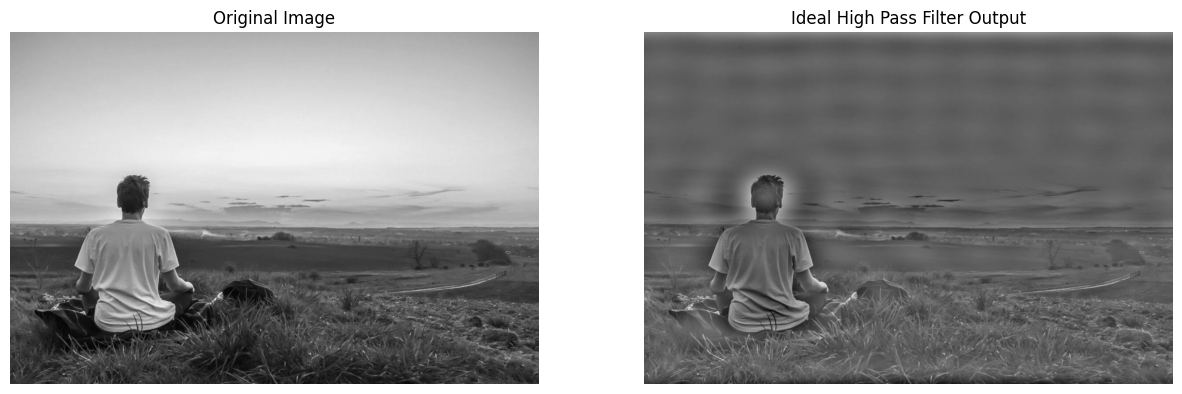

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Reading input image
input_image = cv2.imread('/content/Ideal_High_Pass_Filter.webp')

# Checking if the image is already grayscale
if input_image.shape[2] == 3:
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Saving the size of the input image in pixels
M, N = input_image.shape

# Getting Fourier Transform of the input image
FT_img = np.fft.fft2(input_image)

# Assign Cut-off Frequency
D0 = 10

# Designing filter: Ideal High Pass Filter
u = np.arange(M)
v = np.arange(N)
u[u > M / 2] -= M
v[v > N / 2] -= N

# Calculating Euclidean Distance
D = np.sqrt(u[:, np.newaxis]**2 + v**2)

# Determining the filtering mask
H = np.double(D > D0)

# Check the dimensions of H and FT_img using the shape attribute
x, y = H.shape
x1, y1 = FT_img.shape

# Convolution between the Fourier Transformed image and the mask
G = H * FT_img

# Getting the resultant image by Inverse Fourier Transform of the convoluted image
output_image = np.real(np.fft.ifft2(G))

# Displaying Input Image and Output Image
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Ideal High Pass Filter Output')
plt.axis('off')

plt.show()